# Covariant Shift (Credit Model 1127 (55+1072))

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb

import pickle
from sklearn.externals import joblib
pd.set_option('display.max_columns', 500)

In [35]:
# Read all data
df_cc = pd.read_csv('../prep_data/credit_summary.csv',index_col='ip_id',usecols=range(0,69))
df_cc_test = pd.read_csv('../prep_data/credit_summary_test.csv',index_col='ip_id',usecols=range(0,68))
df_demo = pd.read_csv('../data/demo.csv',index_col='ip_id')
df_y_train = pd.read_csv('../data/y_train.csv',index_col='ip_id')
df_y_test = pd.read_csv('../data/y_test_index.csv',index_col='ip_id')

In [36]:
df.head()

,brth_yr,no_of_dpnd_chl,cis_income,crn_bal,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd,number_of_huge_payment,n_cat1,n_cat10,n_cat11,n_cat12,n_cat13,n_cat14,n_cat15,n_cat16,n_cat2,n_cat3,n_cat4,n_cat5,n_cat6,n_cat7,n_cat8,n_cat9,sum_amt_cat1,sum_amt_cat10,sum_amt_cat11,sum_amt_cat12,sum_amt_cat13,sum_amt_cat14,sum_amt_cat15,sum_amt_cat16,sum_amt_cat2,sum_amt_cat3,sum_amt_cat4,sum_amt_cat5,sum_amt_cat6,sum_amt_cat7,sum_amt_cat8,sum_amt_cat9,avg_amt_cat1,avg_amt_cat10,avg_amt_cat11,avg_amt_cat12,avg_amt_cat13,avg_amt_cat14,avg_amt_cat15,avg_amt_cat16,avg_amt_cat2,avg_amt_cat3,avg_amt_cat4,avg_amt_cat5,avg_amt_cat6,avg_amt_cat7,avg_amt_cat8,avg_amt_cat9,txn_amt,txn_amt_per_month,n_tran,n_tran_per_month,n_card1,n_card2,n_card3,sum_amt_card1,sum_amt_card2,sum_amt_card3,avg_amt_card1,avg_amt_card2,avg_amt_card3,is_train
ip_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1990.0,0.0,45864.0,876428.0,2.0,2.0,3.0,9,0.0,4.0,1.0,7.0,1.0,0.0,9.0,8.0,13.0,9.0,9.0,10.0,3.0,7.0,5.0,5.0,7.0,13333.0,2875.0,50453.0,3364.0,0.0,32269.0,51537.0,72797.0,55395.0,44862.0,45163.0,19225.0,25815.0,20501.0,20275.0,28558.0,3333.250000,2875.0,7207.571429,3364.0,0.00,3585.444444,6442.125000,5599.769231,6155.000,4984.666667,4516.300000,6408.333333,3687.857143,4100.200000,4055.00,4079.714286,486422.0,34744.428571,98.0,7.000000,58.0,25.0,15.0,305683.0,114261.0,66478.0,5270.396552,4570.440000,4431.866667,1
2,1986.0,1.0,43355.0,540649.0,2.0,2.0,1.0,3,0.0,2.0,1.0,7.0,0.0,1.0,14.0,6.0,5.0,8.0,8.0,5.0,5.0,2.0,9.0,4.0,3.0,10152.0,3004.0,41695.0,0.0,1373.0,58746.0,9758.0,27585.0,43577.0,46002.0,17309.0,15582.0,12328.0,30248.0,9019.0,8731.0,5076.000000,3004.0,5956.428571,0.0,1373.00,4196.142857,1626.333333,5517.000000,5447.125,5750.250000,3461.800000,3116.400000,6164.000000,3360.888889,2254.75,2910.333333,335109.0,23936.357143,80.0,5.714286,37.0,30.0,13.0,163238.0,129303.0,42568.0,4411.837838,4310.100000,3274.461538,1
3,1983.0,0.0,48836.0,310503.0,2.0,2.0,2.0,12,0.0,13.0,0.0,11.0,0.0,3.0,13.0,5.0,8.0,5.0,9.0,5.0,3.0,4.0,7.0,5.0,1.0,93283.0,0.0,61483.0,0.0,9204.0,50286.0,17289.0,37243.0,31824.0,65944.0,27985.0,10927.0,29405.0,38185.0,23422.0,8438.0,7175.615385,0.0,5589.363636,0.0,3068.00,3868.153846,3457.800000,4655.375000,6364.800,7327.111111,5597.000000,3642.333333,7351.250000,5455.000000,4684.40,8438.000000,504918.0,36065.571429,92.0,6.571429,42.0,34.0,16.0,239214.0,188063.0,77641.0,5695.571429,5531.264706,4852.562500,1
4,1984.0,0.0,44397.0,34209.0,2.0,2.0,5.0,11,0.0,8.0,0.0,7.0,0.0,4.0,13.0,1.0,6.0,7.0,3.0,11.0,7.0,4.0,12.0,5.0,4.0,56724.0,0.0,20715.0,0.0,4213.0,61795.0,6937.0,18987.0,35546.0,9462.0,58138.0,41344.0,22750.0,65020.0,36972.0,17387.0,7090.500000,0.0,2959.285714,0.0,1053.25,4753.461538,6937.000000,3164.500000,5078.000,3154.000000,5285.272727,5906.285714,5687.500000,5418.333333,7394.40,4346.750000,455990.0,32570.714286,92.0,6.571429,47.0,30.0,15.0,241518.0,139565.0,74907.0,5138.680851,4652.166667,4993.800000,1
5,1986.0,1.0,43281.0,39963.0,2.0,3.0,6.0,9,0.0,10.0,0.0,13.0,0.0,2.0,14.0,1.0,8.0,5.0,17.0,6.0,3.0,2.0,10.0,0.0,4.0,67540.0,0.0,45938.0,0.0,2608.0,63083.0,5678.0,52239.0,48655.0,94661.0,51463.0,13580.0,3703.0,71952.0,0.0,27728.0,6754.000000,0.0,3533.692308,0.0,1304.00,4505.928571,5678.000000,6529.875000,9731.000,5568.294118,8577.166667,4526.666667,1851.500000,7195.200000,0.00,6932.000000,548828.0,39202.000000,95.0,6.785714,46.0,36.0,13.0,247088.0,229892.0,71848.0,5371.478261,6385.888889,5526.769231,1


### Merge data

- For Feature Selection

In [37]:
df_cc_all = pd.concat([df_cc.drop(['label'],axis=1),df_cc_test],axis=0)
df = df_demo.join(df_cc_all,how='inner')

In [38]:
df.shape

(7488, 76)

- For test model

In [39]:
df_test = df_demo[df_demo.index.isin(df_y_test.index)].join(df_cc_test,how='inner')
df_test.shape

(1127, 76)

# Manage the categorical data

### One-hot  Option 1

- For Feature Selection

In [40]:
# df.drop(['act_strt_dt'],axis=1,inplace=True)
# dummy = pd.get_dummies(df[df.select_dtypes('object').columns.tolist()])
# df = pd.concat([dummy,df[df.select_dtypes(['int64','float64']).columns.tolist()]],axis=1)

- For test model

In [41]:
# df_test = pd.get_dummies(df_test[df_test.select_dtypes('object').columns.tolist()])
# df_test = pd.concat([dummy,df_test[df_test.select_dtypes(['int64','float64']).columns.tolist()]],axis=1)
# df_test.shape

### Drop Option 2

- For Feature Selection

In [42]:
df.drop(df.select_dtypes('object').columns.tolist(),axis=1,inplace=True)

- For Test model

In [43]:
df_test.drop(df_test.select_dtypes('object').columns.tolist(),axis=1,inplace=True)

# Create Label "is_train" 0 or 1

In [44]:
df['is_train'] = np.where(df.index.isin(df_y_train.index),1,0)

# Feature Selection
- Find the feature which have the same distribution

In [45]:
def feature_select(df_all, thres = 0.5):
    res = 1
    while res > thres:
        columns = df_all.columns.tolist()

        y = df_all['is_train'].values
        X = df_all.drop(['is_train'],axis=1).values
        X_train, X_val, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
        
        
        rfc = RandomForestClassifier(n_jobs=-1, max_depth=5, min_samples_leaf = 5,
                                    n_estimators=100)
        rfc.fit(X_train,y_train)
        res_prob = rfc.predict_proba(X_val)[:, 1]
        
        res_prob[6361:]
        weights = (1./predictions_train) — 1.
        

        fpr, tpr, thresholds = metrics.roc_curve(y_test.ravel(), res_prob, pos_label=1)
        res = metrics.auc(fpr, tpr)
        
        if res > thres:
            df_all= df_all.drop([columns[rfc.feature_importances_.argmax()]],axis=1)
            
        
    
    print(res)
    return df_all

In [46]:
df_select, weights = feature_select(df,0.7)

/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_di

KeyboardInterrupt: 

In [31]:
weights

NameError: name 'weights' is not defined

/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


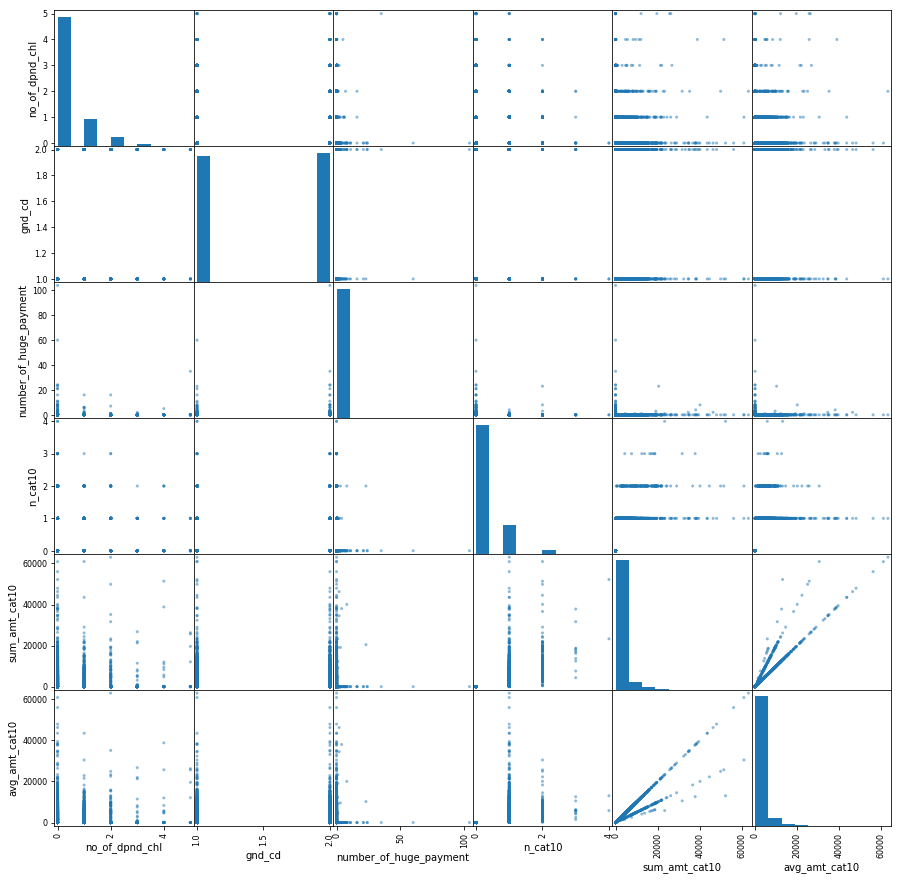

In [25]:
grr = pd.scatter_matrix(df_select.drop(['is_train'], axis = 1), figsize = (15,15))

# Use the selected feature to build a credit model with randomForest

In [86]:
df_train_features = df[df.index.isin(df_y_train.index)][[col for col in df_select.drop(['is_train'],axis=1).columns]]
df_train_label = df_y_train

In [87]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                          random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X_train = df_train_features[:5000]
y_train = df_train_label[:5000]
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1 = eclf1.fit(df_train_features, df_train_label)
print(eclf1.predict(df_train_features))

import numpy as np
from sklearn.metrics import roc_auc_score
y_true = df_train_label
y_scores = eclf1.predict_proba(df_train_features)[:,1]
print (roc_auc_score(y_true, y_scores))

/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 0. 0. ... 1. 1. 1.]
0.7472204147912032


/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Use the trained model to predict the test data

In [151]:
df_test = df_test[df_test.index.isin(df_y_test.index)][[col for col in df_select.drop(['is_train'],axis=1).columns]]

In [163]:
result = eclf1.predict_proba(df_test)[:,1]

In [167]:
df_test['prob1'] = result

In [169]:
df_test[['prob1']].to_csv('result_1127.csv')

In [88]:
from keras.models import Model
from keras.layers import Input, Dense
import keras

In [89]:
X = df_train_features
print(X.shape)
Y = df_train_label
print(Y.shape)

(6361, 6)
(6361, 1)


In [90]:
X = pd.concat([df_train_features,pd.get_dummies(df_train_features['gnd_cd'], prefix='gnd_cd')],axis=1)
# now drop the original 'country' column (you don't need it anymore)
X.drop(['gnd_cd'],axis=1, inplace=True)
X

,no_of_dpnd_chl,number_of_huge_payment,n_cat10,sum_amt_cat10,avg_amt_cat10,gnd_cd_1.0,gnd_cd_2.0
ip_id,,,,,,,
1,0.0,0.0,1.0,2875.0,2875.000000,0,1
2,1.0,0.0,1.0,3004.0,3004.000000,0,1
3,0.0,0.0,0.0,0.0,0.000000,0,1
4,0.0,0.0,0.0,0.0,0.000000,0,1
5,1.0,0.0,0.0,0.0,0.000000,0,1
6,0.0,0.0,1.0,5889.0,5889.000000,0,1
7,1.0,0.0,1.0,11831.0,11831.000000,0,1
8,0.0,0.0,0.0,0.0,0.000000,0,1
9,1.0,0.0,0.0,0.0,0.000000,1,0


In [93]:
inputs = Input(shape=(7,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, batch_size=32, epochs=10)
y_true = df_train_label
y_scores = model.predict(X)[:,0]
print (roc_auc_score(y_true, y_scores))

Epoch 1/10
6361/6361 [==============================] - 1s 160us/step - loss: 0.6624 - acc: 0.9190
Epoch 2/10
6361/6361 [==============================] - 0s 61us/step - loss: 0.4192 - acc: 0.9393
Epoch 3/10
6361/6361 [==============================] - 0s 61us/step - loss: 0.4170 - acc: 0.9403
Epoch 4/10
6361/6361 [==============================] - 0s 61us/step - loss: 0.4268 - acc: 0.9404
Epoch 5/10
6361/6361 [==============================] - 0s 60us/step - loss: 0.4144 - acc: 0.9425
Epoch 6/10
6361/6361 [==============================] - 0s 61us/step - loss: 0.7276 - acc: 0.9227
Epoch 7/10
6361/6361 [==============================] - 0s 60us/step - loss: 0.4143 - acc: 0.9423
Epoch 8/10
6361/6361 [==============================] - 0s 60us/step - loss: 0.4129 - acc: 0.9421
Epoch 9/10
6361/6361 [==============================] - 0s 61us/step - loss: 1.5749 - acc: 0.8686
Epoch 10/10
6361/6361 [==============================] - 0s 61us/step - loss: 0.4533 - acc: 0.9393
0.5968754594733349

In [ ]:
inputs = Input(shape=(6,))
x = Dense(64, activation='sigmoid')(inputs)
x = Dense(32, activation='sigmoid')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, batch_size=32, epochs=10)
y_true = df_train_label
y_scores = model.predict(X)[:,0]
print (roc_auc_score(y_true, y_scores))

In [70]:
inputs = Input(shape=(6,))
x = Dense(64, activation='tanh')(inputs)
x = Dense(32, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, batch_size=32, epochs=10)
y_true = df_train_label
y_scores = model.predict(X)[:,0]
print (roc_auc_score(y_true, y_scores))

ValueError: Error when checking input: expected input_14 to have shape (6,) but got array with shape (8,)

In [47]:
inputs = Input(shape=(6,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, batch_size=32, epochs=10)
y_true = df_train_label
y_scores = model.predict(X)[:,0]
print (roc_auc_score(y_true, y_scores))

Epoch 1/10
6361/6361 [==============================] - 1s 136us/step - loss: 0.4369 - acc: 0.9392
Epoch 2/10
6361/6361 [==============================] - 0s 70us/step - loss: 0.4199 - acc: 0.9404
Epoch 3/10
6361/6361 [==============================] - 0s 78us/step - loss: 0.4159 - acc: 0.9426
Epoch 4/10
6361/6361 [==============================] - 0s 75us/step - loss: 0.4188 - acc: 0.9412
Epoch 5/10
6361/6361 [==============================] - 0s 77us/step - loss: 0.4162 - acc: 0.9418
Epoch 6/10
6361/6361 [==============================] - 0s 68us/step - loss: 0.4173 - acc: 0.9415
Epoch 7/10
6361/6361 [==============================] - 0s 69us/step - loss: 0.4179 - acc: 0.9414
Epoch 8/10
6361/6361 [==============================] - 0s 72us/step - loss: 0.4155 - acc: 0.9410
Epoch 9/10
6361/6361 [==============================] - 0s 66us/step - loss: 0.4147 - acc: 0.9415
Epoch 10/10
6361/6361 [==============================] - 0s 67us/step - loss: 0.4161 - acc: 0.9420
0.5968992200833612

In [60]:
df_test = df_test[df_test.index.isin(df_y_test.index)][[col for col in df_select.drop(['is_train'],axis=1).columns]]
result = model.predict(df_test)[:,0]
result = model.predict(df_test)[:,0]
df_test['prob1'] = result
df_test[['prob1']].to_csv('result_1127_yortz.csv')

/home/thanatlapthawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7a1ec6f28>,
      dtype=object)

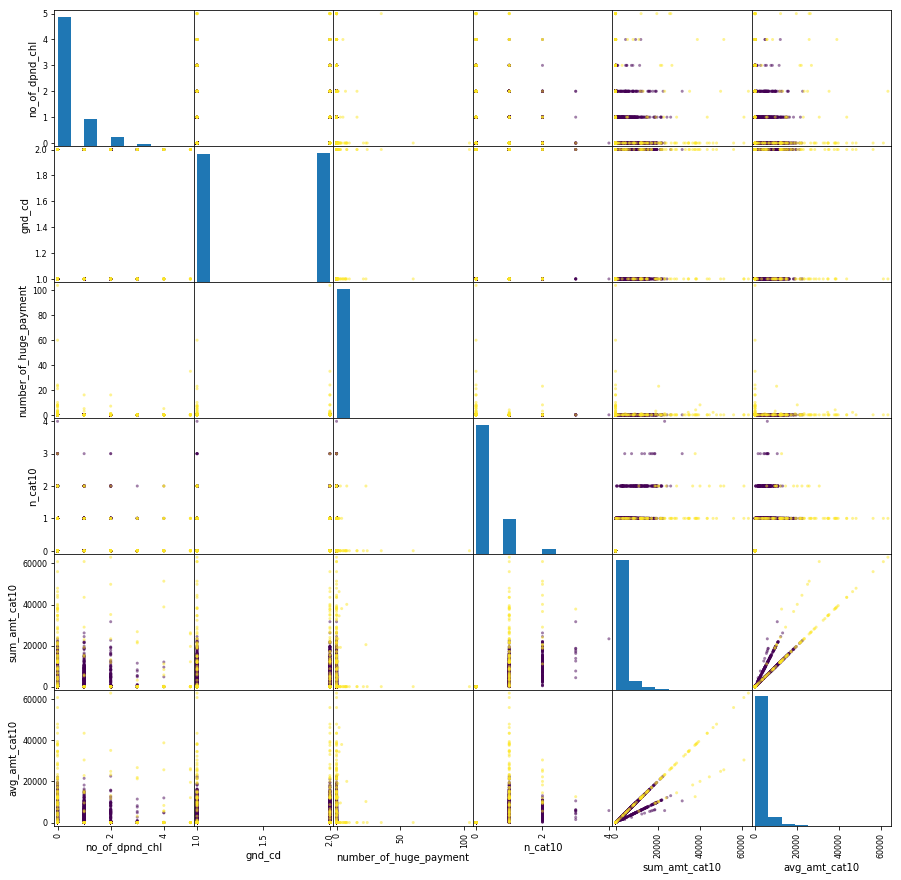

In [50]:
all_df = df_train_features
all_df['label'] = df_train_label['label']
pd.scatter_matrix(all_df.drop(['label'], axis = 1), c=all_df['label'], figsize = (15,15))

,gnd_cd_1.0,gnd_cd_2.0
ip_id,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [98]:
inputs = Input(shape=(7,))
x = Dense(4, activation='relu')(inputs)
x = Dense(2, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, batch_size=32, epochs=10)
y_true = df_train_label
y_scores = model.predict(X)[:,0]
print (roc_auc_score(y_true, y_scores))

Epoch 1/10
6361/6361 [==============================] - ETA: 0s - loss: 4.0229 - acc: 0.631 - 1s 172us/step - loss: 4.0110 - acc: 0.6430
Epoch 2/10
6361/6361 [==============================] - 0s 67us/step - loss: 3.8858 - acc: 0.7291
Epoch 3/10
6361/6361 [==============================] - 0s 70us/step - loss: 3.2700 - acc: 0.7604
Epoch 4/10
6361/6361 [==============================] - 0s 70us/step - loss: 0.7219 - acc: 0.9190
Epoch 5/10
6361/6361 [==============================] - 0s 73us/step - loss: 0.4885 - acc: 0.9329
Epoch 6/10
6361/6361 [==============================] - 0s 70us/step - loss: 0.4544 - acc: 0.9348
Epoch 7/10
6361/6361 [==============================] - 0s 68us/step - loss: 0.4484 - acc: 0.9352
Epoch 8/10
6361/6361 [==============================] - 0s 71us/step - loss: 0.4453 - acc: 0.9352
Epoch 9/10
6361/6361 [==============================] - 0s 67us/step - loss: 0.4424 - acc: 0.9355
Epoch 10/10
6361/6361 [==============================] - 0s 69us/step - loss: 0

In [95]:
df_test = df_test[df_test.index.isin(df_y_test.index)][[col for col in df_select.drop(['is_train'],axis=1).columns]]
result = model.predict(df_test)
df_test['prob1'] = result
df_test[['prob1']].to_csv('yortz_result_1127_x.csv')

ValueError: Error when checking input: expected input_18 to have shape (7,) but got array with shape (6,)

In [97]:
df_test

,no_of_dpnd_chl,gnd_cd,number_of_huge_payment,n_cat10,sum_amt_cat10,avg_amt_cat10
ip_id,,,,,,
6362,0.0,1.0,0.0,0.0,0.0,0.0
6363,0.0,2.0,0.0,0.0,0.0,0.0
6365,0.0,2.0,0.0,0.0,0.0,0.0
6366,0.0,1.0,0.0,0.0,0.0,0.0
6372,0.0,1.0,0.0,0.0,0.0,0.0
6373,0.0,2.0,0.0,0.0,0.0,0.0
6374,0.0,2.0,0.0,0.0,0.0,0.0
6375,0.0,2.0,1.0,0.0,0.0,0.0
6377,0.0,1.0,0.0,0.0,0.0,0.0
